# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

#### Brainstorm

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa

#### Com python

- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Inteligência Artificial)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados


In [1]:
import pandas as pd
df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Ajustes de Dados (Tratamento/Limpeza)

O que estamos buscando aqui de forma geral
são:
- Dados faltantes;
- Dados com valor 0(ZERO) quando deveriam ser valores coerentes;
- Outliers que não representam bem o histórico e logo não ajudam a criação do modelo;
- Erros na base;
- Erros de importação;

In [2]:
df.info()
#dados estão numéricos como deveriam ser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV        200 non-null float64
Radio     200 non-null float64
Jornal    200 non-null float64
Vendas    200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

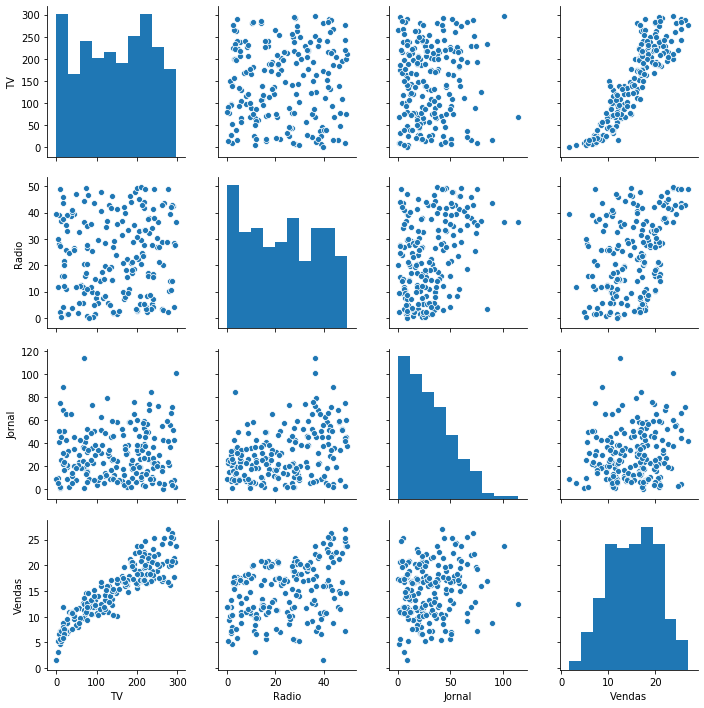

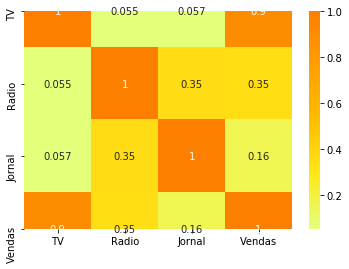

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

**Correlação ( -1 <=> 1 )**
- Correlação forte -> próxima de 1.
- Correlação fraca -> próxima de 0.
- Correlação inversa -> -1.

**Objetivo:** prever vendas. 

Logo, olhar correlacoes com vendas com os meios de marketing.

#### Observações 

- Vendas e TV : Proporcionalidade bem notável (Correlação forte) --> Aumento do investimento, Aumento das vendas.
- Vendas e Rádio: Proporcionalidade não é clara ---> as vendas tendem a existir com alto ou baixo investimento nos anúncios de rádio.
- Vendas e Jornal: Proporcionalidade não é clara ---> espalhado.

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [5]:
from sklearn.model_selection import train_test_split

# é neessário dividr em treinamento e teste para não ocorre o OVERFITTIN (previsão fica muito boa somente para a própio df )

x = df.drop('Vendas',axis=1)
y = df.Vendas

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

#Treino AI por Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train);

#Treino AI por Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train);

C:\Users\felem\AppData\Local\Continuum\anacond\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [7]:
#Teste AI com Regressão Linear
test_pred_lin = lin_reg.predict(x_test)
r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")

#Teste AI com Random Forest
test_pred_rf = rf_reg.predict(x_test)
r2_rf = metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684273
MSE da Regressão Linear: 2.370659971225657
R² do Random Forest: 0.9703262602899134
MSE do Random Forest: 0.7573500000000001


#### Visualização Gráfica das Previsões

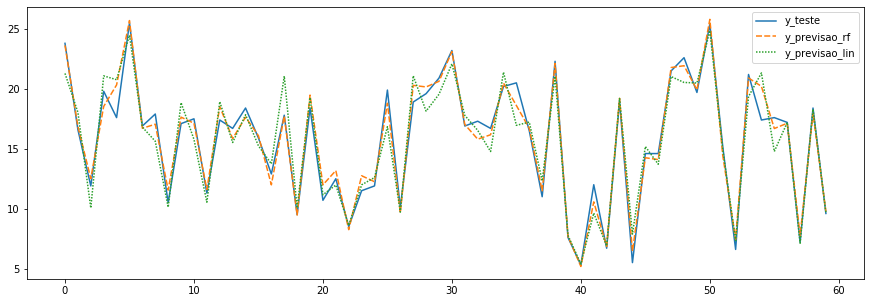

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.63,21.288161
1,16.6,16.87,18.042132
2,11.9,12.51,10.059590
3,19.8,18.53,21.082241
4,17.6,20.33,20.764760
5,25.5,25.70,24.471874
6,16.9,16.71,16.806436
7,17.9,17.05,15.628857
8,10.5,11.55,10.124799
9,17.1,17.64,18.846019


In [8]:
df_resultado = pd.DataFrame()

# df_resultado.index = x_test
df_resultado['y_teste'] = y_test 

df_resultado['y_previsao_rf'] = test_pred_rf # Coluna de previsão da Random Forest
df_resultado['y_previsao_lin'] = test_pred_lin # Coluna de previsão da Regressão Linear

df_resultado = df_resultado.reset_index(drop=True) # acertar o index na ordmem

plt.figure(figsize=(15, 5))

sns.lineplot(data=df_resultado)
plt.show()

display(df_resultado)

#### Qual a importância de cada variável para as vendas?

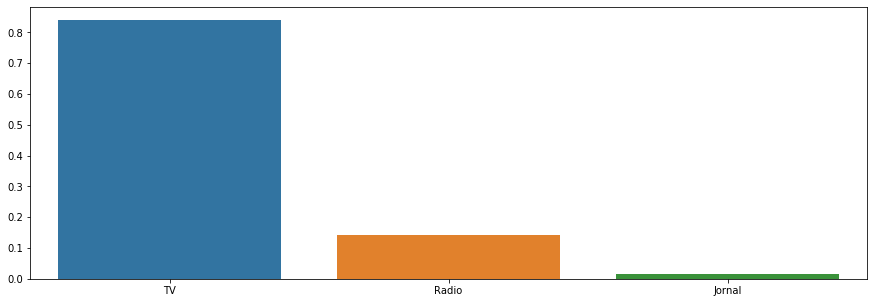

In [9]:
# importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)

plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

#### Conclusões

- O investimento em TV é ~85% relevante;
- O Rádio que também avaliamos anteriormente,pouco mais de 10%;
- Jornal não chegando a mais de 5% de relevância

#### Será que estamos investindo certo?

In [10]:
print(rf_reg.feature_importances_) #importancia de cada investimento (Tv, Radio, Jonal)

[0.84045403 0.1434294  0.01611657]


In [11]:
print(df[["Radio", "Jornal"]].sum()) #balancear os investimentos de acordo com a importancia

Radio     4652.8
Jornal    6110.8
dtype: float64
